# High velocity food transport: a study in projectile cattle
### Jonathan Kelley and Solomon Greenberg

![he](flyingcow.jpg)

2018 has been a crazy year for technology. Smartphones are up to 89.6% screen-to-body ratio. Fidget spinners took over the world by storm. IoT-connected toilets now track your bowel movements and let you share it with your friends. 

Despite the incredible advances in humanity's cutting edge, the field of high velocity food transport remains nearly silent. However, Elon Musk's proposed rocket transport concepts might indeed change the farm-to-fork experience for our daily bread.  

While Musk might understand the logistics of supply chain and have a degree in engineering, he is still thinking "inside-the-box." We see the most efficient high-velocity food transport system completely void of rockets - fuel is expensive, big explosions are common, and it shouldn't take several million dollars to launch your next Big Mac from SanFran to Boston. Our goal: launch cattle across the state of Massachussets without a rocket. 


A big catapult should do the trick.

Ideally, our beachhead market would be the type of cattle that is most efficient to launch - our catapult can be cheaper and we can launch higher quantities. At least that's what the "suits upstairs" said.

Anyways, we need to figure out which cattle would fly the farthest for a fixed amount of weight.

To maintain consistency, we will be launching ~630 kg of each animal with a single shot

Our animals:

| Animal         | Mass (kg) | Quantity Per Launch |
|----------------|-----------|---------------------|
| Chicken        | 6.35      | 99                  |
| Cow            | 630.49    | 1                   |
| Goat           | 124.74    | 5                   |
| Pig            | 127.91    | 5                   |
| Sheep          | 113.31    | 5                   |
| Fish (Tilapia) | 2.27      | 228                 |

sidebar: a fishing vessel that can launch the fish back to shore is actually a decent business idea.

### Robust and Versatile!

We'd love to be able to launch any plane/train/animal that our heart so desires, so we need a robust physics model. The four fundamental forces of the universe include:
- Strong force
- Weak Force
- Gravity
- Electromagnetism

Obviously, this is too general for us to write a single "net force" function, so our model will allow users to input their own force function that returns a force from the object's state.

We also need some understanding of the object's aerodynamic properties (surprisingly falls under electromagnetism).
We could either generalize the flight physics or write our own 2D computational fluid dynamics solver.

We wrote our own CFD solver to handle images (emoji too)!

In [96]:
from modsim_cdf import image2cdf, emoji2image

SyntaxError: invalid syntax (modsim_cdf.py, line 8)

### Behind the scenes

The CFD solver takes the input image and converts it to a 2D array. We can then solve the Navier-Stokes fluid equations where the left-most boundary conditions set the air flow at fixed initial momentum.

By analyzing the momemntum drop of the fluid as it is solved around the input image, we can get values for the coefficients of drag and lift. More analysis can determine other characteristics like skin friction and form friction, but we are assuming turbulent fluid flow regardless of the object shape. 

![Example of Navier-Stokes solved around a sphere](example_fluidfriction.png)

### Building a projectile model

We can treat each animal as a rigid body with a mass, position, velocity, and net acceleration.

Each animal also has the coefficients of drag and lift that we determined with the CFD solver.

In [ ]:
    
class projectile:
    def __int__(self, profile, mass, dt = .1, is_emoji = False):
        '''
        Initalize a template projectile with basic 3d properties.
        This function requires a profile (image) to be passed in as a string.
        This string can either be the file location to the image or the unicode for an emoji.
        Make sure to set the is_emoji parameter to true when relevant.
        '''
        self.state.position = np.array([0,0,0])
        self.positions = []
        
        self.state.velocity = np.array([0,0,0])
        self.velocities = []

        self.state.acceleration = np.array([0,0,0])
        self.accelerations = []
        
        self.state.dt = dt
        self.times = []
        
        self.state.mass = mass
        
        self.is_emoji = is_emoji
        self.define_aerodynamics(self.is_emoji)
        
        
        
    def define_aerodynamics(self, is_emoji = False):
        '''
        Using the modsim_cdf package, we can generate relevant aerodynamic properties of whatever image we want.
        This function will use the relevant solver based on the is_emoji flag. 
        The current output properties are the coefficients of lift and drag.
        '''
        if is_emoji:
            aerodynamics = modsim_cdf.emoji2cdf(emoji, 
                                                emoji_width, 
                                                properties = ["cd", "cl"])
        else:
            aerodynamics = modsim_cdf.image2cdf(image, 
                                                image_width, 
                                                properties = ["cd", "cl"])
        self.cd = aerodynamics['coefficient_of_drag']
        self.cl = aerodynamics['coefficient_of_lift']
        self.aerodynamic_properties = aerodynamics['properties']

        
        
        
    def update_state(self, position = self.position, velocity = self.velocity, acceleration = self.acceleration, dt = self.dt):
        '''
        Updates the state of the object and adds state to state history
        dt can be overrriden for adaptive time step algorithms but defaults to the intial timestep        
        '''
        self.state.position = position
        self.positions.append(position)

        self.state.velocity = velocity
        self.velocities.append(velocity)
                
        self.state.acceleration = acceleration
        self.accelerations.append(acceleration)
        
        self.state.t += self.dt
        self.times.append(self.t)
                

    def get_accel(self):
        '''
        Loops through the associated force functions and returns a net acceleration
        '''
        
        net_force = np.array([0,0,0])
        
        for each_force in self.forces:
            net_force += each_force(self.state)
        
        return(netforce/self.state.mass)

        
    def tick(self, dt = self.dt):
        '''
        Use a custom RK4 method to move the object.
        The default behavior is to use the dt of the object when initalized - this can be overridden with the dt parameter
        The defaukt behavior will also automatically log the state of the object every step, this can be set to 0 for never or n for striping
        '''
        velo = self.velo
    
        k1 = dt * self.get_accel();
        l1 = dt * velo;

        k2 = dt * self.get_accel(0.5 * l1);
        l2 = dt * (velo + (0.5 * k1));

        k3 = dt * self.get_accel(pos + (0.5 * l2) );
        l3 = dt * (velo + (0.5 * k2));

        k4 = dt * self.get_accel(pos + l3);
        l4 = dt * (velo + k3);

        velo += (k1 + (2.0 * k2) + (2.0 * k3) + k4) / 6.0;
        pos += (l1 + (2.0 * l2) + (2.0 * l3) + l4) / 6.0; 
        
        self.update_state(pos = self.position,
                          velocity = self.velocity,
                          acceleration = self.get_accel())

In [ ]:

class launcher:
    def __int__(self):
        pass
    
    def load_projectile(self, projectile):
        self.projectile = projectile
        self.projectile.position = self.release_position
        
        
        
    def launch_projectile(self):
        
        asd
    
    def full_launch(self, projectile):
        self.load_projectile(projectile)


### With the framework above, we can load and launch nearly any object we want with somewhat realistic physics

Our custom module `modsim_cdf` gives us useful information about the aerodynamic properties of whatever object we initialize. For instance, we can learn the drag and lift properties of a chicken from an image pulled from google:

![chicken](images/chicken.png)

In [49]:
chicken = projectile(image = 'images/chicken.png',
                     image_width = 0.6096,  #meters
                     mass = 1.25,          #kilograms
                     dt = dt)

chicken.aerodynamic_properties

NameError: name 'projectile' is not defined


or even from the emoji version (Apple's edition):

🐔


In [ ]:
emoji_chicken = projectile(image = '🐔',
                           image_width = 0.6096,  #meters
                           mass = 1.25,          #kilograms
                           dt = dt)

chicken.aerodynamic_properties

In [1]:
dt = .1

catapult = launcher()

chicken = projectile(image = 'images/chicken.png',
                     mass = 1.25,
                     dt = dt)



catapult.load(chicken)
d.addresult(chicken)

cow = projectile(image = 'images/chicken.png', mass = 1.25, dt = dt)
goat = projectile(image = 'images/chicken.png', mass = 1.25, dt = dt)

SyntaxError: invalid syntax (<ipython-input-1-fe0e8c49d302>, line 1)

In [52]:
a = Emoji.to_image('\u263A')

In [51]:
a

(1, 2)

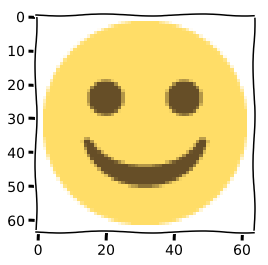

In [97]:

im = imageio.imread('https://cdn.jsdelivr.net/emojione/assets/png/263A.png?v=1.2.5')
plt.imshow(im)